In [23]:
import tensorflow as tf
import cv2


In [24]:
import numpy as np

In [25]:
# Read image

In [26]:
test_img = cv2.imread("Training_samples/outside110.jpg")

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

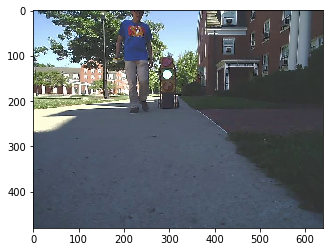

In [28]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

# Load Model

In [29]:
from utils import label_map_util
PATH_TO_CKPT = "traffic_inference_graph/frozen_inference_graph.pb"
PATH_TO_LABELS = 'traffic_inference_graph/traffic_light.pbtxt'
NUM_CLASSES = 3

# load graph
detection_graph = tf.Graph()
with detection_graph.as_default():
	od_graph_def = tf.GraphDef()
	with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
		serialized_graph = fid.read()
		od_graph_def.ParseFromString(serialized_graph)
		tf.import_graph_def(od_graph_def, name='')
        
# load label
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map,max_num_classes=NUM_CLASSES,use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Make Prediction

In [30]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')  
        image_np_expanded = np.expand_dims(test_img, axis=0)
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})

In [31]:
im_width=test_img.shape[1]
im_height = test_img.shape[0]
ymin, xmin, ymax, xmax = boxes[0][0].tolist()


In [32]:
left, right, top, bottom = map(lambda x:int(x),[xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height])

In [33]:

new_img = cv2.rectangle(test_img.copy(), (left, top), (right, bottom), (0, 128, 255), 2)

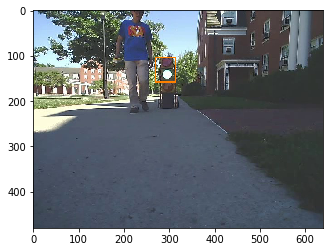

In [34]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [37]:
classes[0][0] == 2.0

True

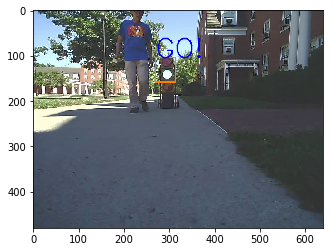

In [36]:
new_img = cv2.rectangle(test_img.copy(), (left, top), (right, bottom), (0, 128, 255), 2)
font = cv2.FONT_HERSHEY_SIMPLEX
new_img = cv2.putText(new_img,'GO!',(left, top), font, 2,(255,0,0),2,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))